# Miniproyecto - Ciencia de Datos

Elaborado por Roberto Alonso Herraiz.

## Paso 1

Cargamos el conjunto de datos:

In [1]:
import numpy as np
import pandas as pd

raw_sales = pd.read_csv('sales.csv')

raw_sales

,id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
205,196,38.2,3.7,13.8,7.6
206,197,94.2,4.9,8.1,9.7
207,198,177.0,9.3,6.4,12.8
208,199,NaN,42.0,66.2,25.5


In [2]:
raw_sales.describe()

,id,TV,radio,newspaper,sales
count,210.000000,2.070000e+02,210.000000,210.000000,210.000000
mean,100.809524,1.449275e+10,23.200476,30.294762,13.959048
std,57.399481,1.198000e+11,14.827575,21.726517,5.196055
min,1.000000,7.000000e-01,0.000000,0.300000,1.600000
25%,52.250000,7.405000e+01,10.025000,12.025000,10.400000
50%,101.500000,1.498000e+02,22.400000,25.750000,12.900000
75%,149.750000,2.200500e+02,36.575000,44.900000,17.300000
max,200.000000,1.000000e+12,49.600000,114.000000,27.000000


### 1.1 - Limpiar el conjunto de datos

Usamos `.dropna()` para eliminar las filas con NaN y `.drop_duplicates('id')` para eliminar las campañas duplicadas

In [3]:
sales = raw_sales.dropna().drop_duplicates('id')

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 209
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         197 non-null    int64  
 1   TV         197 non-null    float64
 2   radio      197 non-null    float64
 3   newspaper  197 non-null    float64
 4   sales      197 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 9.2 KB


Parece que tenemos varios valores inmensamente grandes en sales.TV, vamos a buscarlos y limpiarlos

In [5]:
sales.sort_values('TV', ascending=False)

,id,TV,radio,newspaper,sales
15,15,1.000000e+12,32.9,46.0,19.0
58,58,1.000000e+12,19.2,16.6,13.2
98,95,1.000000e+12,14.0,10.9,11.5
105,102,2.964000e+02,36.3,100.9,23.8
43,43,2.936000e+02,27.7,1.8,20.7
...,...,...,...,...,...
131,127,7.800000e+00,38.9,50.6,6.6
57,57,7.300000e+00,28.1,41.4,5.5
81,79,5.400000e+00,29.9,9.4,5.3
165,156,4.100000e+00,11.6,5.7,3.2


Utilizamos una máscara para mostrar solo los valores de la columna TV mayores de 300 y luego reescribimos nuestro conjunto de datos

In [6]:
sales = sales[sales.TV < 300] # los mayores

Comprobamos:

In [7]:
sales.sort_values('TV', ascending=False)

,id,TV,radio,newspaper,sales
105,102,296.4,36.3,100.9,23.8
43,43,293.6,27.7,1.8,20.7
31,31,292.9,28.3,43.2,21.4
36,36,290.7,4.1,8.5,12.8
102,99,289.7,42.3,51.2,25.4
...,...,...,...,...,...
131,127,7.8,38.9,50.6,6.6
57,57,7.3,28.1,41.4,5.5
81,79,5.4,29.9,9.4,5.3
165,156,4.1,11.6,5.7,3.2


### 1.2 - Representación (usando método `scatter`)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') # usamos el estilo seaborn en todos los plots

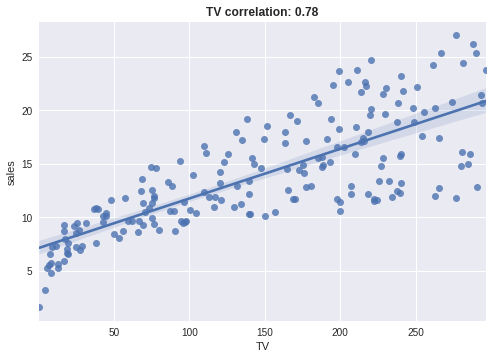

In [9]:
Pearson_TV = np.corrcoef(sales.TV, sales.sales)

sns.regplot(sales.TV, sales.sales)

title = f'TV correlation: {Pearson_TV[0][1]:.2f}'

title_dict={'fontweight': 1000}

plt.title(title, fontdict=title_dict);

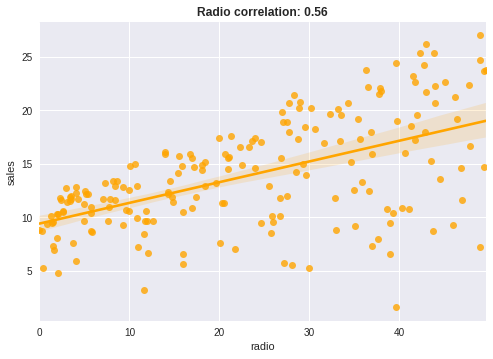

In [10]:
Pearson_radio = np.corrcoef(sales.radio, sales.sales)

sns.regplot(sales.radio, sales.sales, color='ORANGE')

title = f'Radio correlation: {Pearson_radio[0][1]:.2f}'

plt.title(title, fontdict=title_dict);

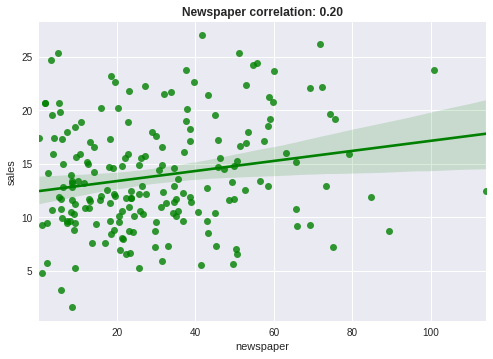

In [11]:
Pearson_newspaper = np.corrcoef(sales.newspaper, sales.sales)

sns.regplot(sales.newspaper, sales.sales, color='GREEN')

title = f'Newspaper correlation: {Pearson_newspaper[0][1]:.2f}'

plt.title(title, fontdict=title_dict);

## Paso 2

### 2.1 Añadir columna con cantidad total invertida por venta

In [12]:
# TIPS -> Total Investment Per Sale
sales['TIPS'] = (sales['TV'] + sales['radio'] + sales['newspaper']) / sales['sales']

In [13]:
sales.describe()

,id,TV,radio,newspaper,sales,TIPS
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,100.474227,145.444845,23.001031,30.246392,13.868557,14.020219
std,57.831646,86.032061,14.846077,21.747570,5.135792,4.185965
min,1.000000,0.700000,0.000000,0.300000,1.600000,2.437500
25%,50.250000,71.300000,9.675000,12.650000,10.300000,11.209759
50%,101.500000,148.500000,22.400000,25.600000,12.850000,13.599299
75%,150.750000,218.475000,36.450000,43.275000,17.275000,15.854725
max,200.000000,296.400000,49.600000,114.000000,27.000000,30.625000


## 2.2 Añadir una columna que indique si la campaña ha sido exitosa. Para ello, debe cumplir:
- Cantidad total invertida por venta es mayor de 20€
- Vendidas más de 15k unidades

In [14]:
mask = (sales.TIPS < 20) & (sales.sales > 15)

In [15]:
mask.describe()

count       194
unique        2
top       False
freq        124
dtype: object

In [16]:
sales['success'] = mask

In [17]:
sales

,id,TV,radio,newspaper,sales,TIPS,success
0,1,230.1,37.8,69.2,22.1,15.253394,True
1,2,44.5,39.3,45.1,10.4,12.394231,False
2,3,17.2,45.9,69.3,9.3,14.236559,False
3,4,151.5,41.3,58.5,18.5,13.583784,True
4,5,180.8,10.8,58.4,12.9,19.379845,False
...,...,...,...,...,...,...,...
204,195,149.7,35.6,6.0,17.3,11.057803,True
205,196,38.2,3.7,13.8,7.6,7.328947,False
206,197,94.2,4.9,8.1,9.7,11.051546,False
207,198,177.0,9.3,6.4,12.8,15.054688,False


### Responder a la pregunta: **¿Cuántas campañas fueron exitosas?**

In [18]:
sales[sales.success == True]

,id,TV,radio,newspaper,sales,TIPS,success
0,1,230.1,37.8,69.2,22.1,15.253394,True
3,4,151.5,41.3,58.5,18.5,13.583784,True
12,12,214.7,24.0,4.0,17.4,13.948276,True
16,16,195.4,47.7,52.9,22.4,13.214286,True
18,18,281.4,39.6,55.8,24.4,15.442623,True
...,...,...,...,...,...,...,...
195,186,205.0,45.1,19.6,22.6,11.933628,True
197,188,191.1,28.7,18.2,17.3,13.757225,True
198,189,286.0,13.9,3.7,15.9,19.094340,True
203,194,166.8,42.0,3.6,19.6,10.836735,True


Según los criterios establecidos, un total de **70 campañas** fueron exitosas.

## Paso 3

### 3.1 Crear el conjunto de entrenamiento con las filas de id <= 160

In [19]:
sales_train = sales[sales.id <= 160]

In [20]:
sales_train

,id,TV,radio,newspaper,sales,TIPS,success
0,1,230.1,37.8,69.2,22.1,15.253394,True
1,2,44.5,39.3,45.1,10.4,12.394231,False
2,3,17.2,45.9,69.3,9.3,14.236559,False
3,4,151.5,41.3,58.5,18.5,13.583784,True
4,5,180.8,10.8,58.4,12.9,19.379845,False
...,...,...,...,...,...,...,...
165,156,4.1,11.6,5.7,3.2,6.687500,False
166,157,93.9,43.5,50.5,15.3,12.281046,True
167,158,149.8,1.3,24.3,10.1,17.366337,False
168,159,11.7,36.9,45.2,7.3,12.849315,False


### 3.2 Entrenar un clasificador Gaussian Naive-Bayes para determinar si una campaña será exitosa y calcular la fracción que es clasificada correctamente

Separamos el target (success) del resto del conjunto de datos:

In [21]:
sales_train_y = sales_train.success 

In [22]:
sales_train_y

0       True
1      False
2      False
3       True
4      False
       ...  
165    False
166     True
167    False
168    False
169    False
Name: success, Length: 155, dtype: bool

In [23]:
sales_train_X = sales_train.drop('success', axis=1)

In [24]:
sales_train_X

,id,TV,radio,newspaper,sales,TIPS
0,1,230.1,37.8,69.2,22.1,15.253394
1,2,44.5,39.3,45.1,10.4,12.394231
2,3,17.2,45.9,69.3,9.3,14.236559
3,4,151.5,41.3,58.5,18.5,13.583784
4,5,180.8,10.8,58.4,12.9,19.379845
...,...,...,...,...,...,...
165,156,4.1,11.6,5.7,3.2,6.687500
166,157,93.9,43.5,50.5,15.3,12.281046
167,158,149.8,1.3,24.3,10.1,17.366337
168,159,11.7,36.9,45.2,7.3,12.849315


Preparamos los datos para usar un modelo de entrenamiento

In [52]:
from sklearn.model_selection import train_test_split

nb_Xtrain, nb_Xtest, nb_ytrain, nb_ytest = train_test_split(sales_train_X, sales_train_y, random_state=1) # con el random desordenamos las filas para romper sesgos si los hubiera

Entrenamos usando el clasificador Naive-Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB    # Elegimos la clase de modelo

nb_model = GaussianNB()                          # Instanciamos el modelo

nb_model.fit(nb_Xtrain, nb_ytrain)                     # Entrenamos el modelo con los datos

nb_y_model = nb_model.predict(Xtest)                # Predecimos con los datos sin usar

Calculamos la fracción del conjunto de entrenamiento clasificado correctamente

In [27]:
from sklearn.metrics import accuracy_score
nb_accuracy_score = accuracy_score(nb_ytest, nb_y_model)
nb_accuracy_score

0.9487179487179487

## 3.3 Usando un clasificador de regresión logística

In [56]:
lr_Xtrain, lr_Xtest, lr_ytrain, lr_ytest = train_test_split(sales_train_X, sales_train_y, random_state=1)

In [57]:
from sklearn.linear_model import LogisticRegression       # La clase del modelo será regresión logística

lr_model = LogisticRegression()                           # Instanciamos el modelo

lr_model.fit(lr_Xtrain, lr_ytrain)                        # Entrenamos el modelo con los datos de entrenamiento

lr_y_model = lr_model.predict(lr_Xtest)                   # Precedimos el resultado con los datos de test sin usar

Calculamos otra vez la fracción del conjunto de entrenamiento clasificado correctamente

In [58]:
lr_accuracy_score = accuracy_score(lr_ytest, lr_y_model)
lr_accuracy_score

0.9743589743589743

### 3.4 usando un clasificador "random forest"

In [59]:
rf_Xtrain, rf_Xtest, rf_ytrain, rf_ytest = train_test_split(sales_train_X, sales_train_y, random_state=1)

In [60]:
from sklearn.ensemble import RandomForestClassifier    # La clase del modelo será random forest

rf_model = RandomForestClassifier()                    # Instanciamos el modelo

rf_model.fit(rf_Xtrain, rf_ytrain)                     # Entrenamos el modelo con los datos de entrenamiento

rf_y_pred = rf_model.predict(rf_Xtest)                 # Precedimos el resultado con los datos de test sin usar

In [61]:
rf_accuracy_score = accuracy_score(rf_ytest, rf_y_pred)
rf_accuracy_score

0.9743589743589743

Respondiendo a la pregunta:

In [62]:
print(f'Puntuación Naive-Bayes: {nb_accuracy_score}')
print(f'Puntuación Logistic Regression: {lr_accuracy_score}')
print(f'Puntuación Random Forest: {rf_accuracy_score}')

Puntuación Naive-Bayes: 0.9487179487179487
Puntuación Logistic Regression: 0.9743589743589743
Puntuación Random Forest: 0.9743589743589743


Parece ser que los métodos de `Logistic Regression` y de `Random Forest` han sabido precedir mejor si la campaña ha sido exitosa.

## Paso 4

### 4.1 Crear un conjunto de prueba con las filas de id > 160

In [35]:
sales_test = sales[sales.id > 160]

In [36]:
sales_test_y = sales_train.success

In [37]:
sales_train_X = sales_train.drop('success', axis=1)

### Evaluar el rendimiento del clasificador de la siguiente manera:
- ¿Qué porcentaje del conjunto de prueba fue clasificado correctamente (aciertos sobre el total)? Es deseable que este número llegue al menos al 80%
- ¿Cuál es la proporción de falsos positivos y falsos negativos?


Para calcular la proporción de falsos positivos y negativos tendremos que obtener la matriz de confusión:

In [38]:
from sklearn.metrics import confusion_matrix

### 1 - Naive-Bayes

In [64]:
nb_y_pre_2 = nb_model.predict(sales_train_X)

In [65]:
nb_accuracy_score_2 = accuracy_score(sales_test_y, nb_y_pre_2)
nb_accuracy_score_2

0.9806451612903225

In [66]:
nb_confusion_matrix = confusion_matrix(sales_test_y, nb_y_pre_2)
nb_confusion_matrix

array([[95,  1],
       [ 2, 57]])

In [67]:
total_predictions = 95 + 1 + 2 + 57

nb_total_true_predictions = nb_confusion_matrix[0][0] + nb_confusion_matrix[1][1]

nb_true_positive_predictions = nb_confusion_matrix[1][1]
nb_true_negative_predictions = nb_confusion_matrix[0][0]
nb_false_positive_predictions = nb_confusion_matrix[0][1]
nb_false_negative_predictions = nb_confusion_matrix[1][0]


print(f'''
Naive-Bayes
-----------

Predicciones "exitosas" verdaderas: {nb_true_positive_predictions}
Predicciones "no exitosas" verdaderas: {nb_true_negative_predictions}
Falsos positivos: {nb_false_positive_predictions}
Falsos negativos: {nb_false_negative_predictions}


Predicciones totales: {total_predictions}

Porcentaje predicciones correctas = {(nb_total_true_predictions / total_predictions) * 100:.2f} %
Porcentaje falsos positivos = {(nb_false_positive_predictions / total_predictions) * 100:.2f} %
Porcentaje falsos negativos = {(nb_false_negative_predictions / total_predictions) * 100:.2f} %
''')


Naive-Bayes
-----------

Predicciones "exitosas" verdaderas: 57
Predicciones "no exitosas" verdaderas: 95
Falsos positivos: 1
Falsos negativos: 2


Predicciones totales: 155

Porcentaje predicciones correctas = 98.06 %
Porcentaje falsos positivos = 0.65 %
Porcentaje falsos negativos = 1.29 %



### 2 - Logistic Regression

In [68]:
lr_y_pre_2 = lr_model.predict(sales_train_X)

In [69]:
lr_accuracy_score_2 = accuracy_score(sales_test_y, lr_y_pre_2)
lr_accuracy_score_2

0.9935483870967742

In [71]:
lr_confusion_matrix = confusion_matrix(sales_test_y, lr_y_pre_2)
lr_confusion_matrix

array([[95,  1],
       [ 0, 59]])

In [72]:
lr_total_true_predictions = lr_confusion_matrix[0][0] + lr_confusion_matrix[1][1]

lr_true_positive_predictions = lr_confusion_matrix[1][1]
lr_true_negative_predictions = lr_confusion_matrix[0][0]
lr_false_positive_predictions = lr_confusion_matrix[0][1]
lr_false_negative_predictions = lr_confusion_matrix[1][0]


print(f'''
Logistic Regression
-------------------

Predicciones "exitosas" verdaderas: {lr_true_positive_predictions}
Predicciones "no exitosas" verdaderas: {lr_true_negative_predictions}
Falsos positivos: {lr_false_positive_predictions}
Falsos negativos: {lr_false_negative_predictions}


Predicciones totales: {total_predictions}

Porcentaje predicciones correctas = {(lr_total_true_predictions / total_predictions) * 100:.2f} %
Porcentaje falsos positivos = {(lr_false_positive_predictions / total_predictions) * 100:.2f} %
Porcentaje falsos negativos = {(lr_false_negative_predictions / total_predictions) * 100:.2f} %
''')


Logistic Regression
-------------------

Predicciones "exitosas" verdaderas: 59
Predicciones "no exitosas" verdaderas: 95
Falsos positivos: 1
Falsos negativos: 0


Predicciones totales: 155

Porcentaje predicciones correctas = 99.35 %
Porcentaje falsos positivos = 0.65 %
Porcentaje falsos negativos = 0.00 %



### 3 - Random Forest

In [73]:
rf_y_pre_2 = rf_model.predict(sales_train_X)

In [75]:
rf_accuracy_score_2 = accuracy_score(sales_test_y, rf_y_pre_2)
rf_accuracy_score_2

0.9935483870967742

In [76]:
rf_confusion_matrix = confusion_matrix(sales_test_y, rf_y_pre_2)
rf_confusion_matrix

array([[95,  1],
       [ 0, 59]])

In [77]:
rf_total_true_predictions = rf_confusion_matrix[0][0] + rf_confusion_matrix[1][1]

rf_true_positive_predictions = rf_confusion_matrix[1][1]
rf_true_negative_predictions = rf_confusion_matrix[0][0]
rf_false_positive_predictions = rf_confusion_matrix[0][1]
rf_false_negative_predictions = rf_confusion_matrix[1][0]


print(f'''
Random Forest
-------------

Predicciones "exitosas" verdaderas: {rf_true_positive_predictions}
Predicciones "no exitosas" verdaderas: {rf_true_negative_predictions}
Falsos positivos: {rf_false_positive_predictions}
Falsos negativos: {rf_false_negative_predictions}


Predicciones totales: {total_predictions}

Porcentaje predicciones correctas = {(rf_total_true_predictions / total_predictions) * 100:.2f} %
Porcentaje falsos positivos = {(rf_false_positive_predictions / total_predictions) * 100:.2f} %
Porcentaje falsos negativos = {(rf_false_negative_predictions / total_predictions) * 100:.2f} %
''')


Random Forest
-------------

Predicciones "exitosas" verdaderas: 59
Predicciones "no exitosas" verdaderas: 95
Falsos positivos: 1
Falsos negativos: 0


Predicciones totales: 155

Porcentaje predicciones correctas = 99.35 %
Porcentaje falsos positivos = 0.65 %
Porcentaje falsos negativos = 0.00 %



In [78]:
print(f'Puntuación Naive-Bayes: {nb_accuracy_score_2:.4f}')
print(f'Puntuación Logistic Regression: {lr_accuracy_score_2:.4f}')
print(f'Puntuación Random Forest: {rf_accuracy_score_2:.4f}')

Puntuación Naive-Bayes: 0.9806
Puntuación Logistic Regression: 0.9935
Puntuación Random Forest: 0.9935
